# Project: Wrangling and Analyze Data

## Table of content

1. [Data Gathering](#data-gathering) <br>
    1.1 [Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)](#1-directly-download-the-weratedogs-twitter-archive-data-twitter_archive_enhancedcsv) <br>
    1.2 [Use the Requests library to download the tweet image prediction (image_predictions.tsv)](#2-use-the-requests-library-to-download-the-tweet-image-prediction-image_predictionstsv) <br>
    1.3 [Use the Tweepy library to query additional data via the Twitter API (**tweet_json.txt**)](#3-use-the-tweepy-library-to-query-additional-data-via-the-twitter-api-tweet_jsontxt)
2. [Assessing Data](#assessing-data) <br>
    2.1 [Quality Issues](#quality-issues) <br>
    2.2 [Tidiness Issues](#tidiness-issues)
3. [Cleaning Data](#cleaning-data) <br>
        [Issue #1](#issue-1-some-cells-in-the-expended_urls-column-have-duplicated-image-url-and-unterminated-images-urls-and-some-links-lead-to-video-and-external-webpages) <br>
        [Issue #2](#issue-2-there-are-cells-in-the-expanded_urls-column-with-null-values) <br>
        [Issue #3](#3-use-the-tweepy-library-to-query-additional-data-via-the-twitter-api-tweet_jsontxt) <br>
        [Issue #4](#issue-4-the-timestamp-column-has-unnecessary-characters-0000) <br>
        [Issue #5](#issue-5-the-data-type-of-the-tweet_id-column-is-int-which-is-supposed-to-be-object) <br>
        [Issue #6](#issue-6-the-data-type-of-the-timestamp-column-is-supposed-to-be-datetime-not-object) <br>
        [Issue #7](#issue-7-the-cells-in-the-text-column-contain-short-images-urls) <br>
        [Issue #8](#issue-8-the-text-columns-contains-ratings) <br>
        [Issue #9](#issue-9-in-the-name-column-the-abscence-of-value-is-represented-by-the-string-none) <br>
        [Issue #10](#issue-10-the-columns-doggo-floofer-pupper-puppo-represent-the-same-value-which-is-dog-stage) <br>
        [Issue #11](#issue-11-there-are-many-useless-columns-in_reply_to_status_id-in_reply_to_user_id-source-retweeted_status_id-retweeted_status_user_id-and-retweeted_status_timestamp) <br>
        [Issue #12](#issue-12-the-timestamp-column-contains-time-day-month-and-year-at-once) <br>
        [Issue #13](#issue-13-the-image_predictions-dataset-contains-mutliple-predictions-for-each-jpg-image) <br>
4. [Storing Data](#storing-data)
5. [Analyzing and Visualizing Data](#analyzing-and-visualizing-data)

## Data Gathering [🔝](#table-of-content)

##### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [95]:
#python 3.9.12
import json
import pandas as pd
import requests
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
# Keeping pandas from truncating long strings
pd.set_option('display.max_colwidth', None)


In [97]:
weratedog = pd.read_csv('./twitter-archive-enhanced.csv')
weratedog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv) 

In [98]:
response = requests.get(
    ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

pathlib.Path('./image-predictions.tsv').write_bytes(response.content)

335079

In [99]:
img_pred = pd.read_csv('./image-predictions.tsv', sep='\t')
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [100]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### 3. Use the Tweepy library to query additional data via the Twitter API (**tweet_json.txt**)

In [101]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(f"{count}: {str(tweet_id)}")
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
            
# end = timer()
# print(end - start)
# print(fails_dict)


In [102]:
# Since a was unable to get and API key from tweeter, i'm using the 'tweet_json.txt' file provided in the course
def get_additional_data():
    with open('tweet-json.txt') as tweet_file:
        tweets = tweet_file.readlines()
    df_data = {'id_str': [], 'retweet_count': [], 'favorite_count': []}
    for tweet in tweets:
        data = json.loads(tweet)
        df_data['id_str'].append(int(data['id_str']))
        df_data['retweet_count'].append(int(data['retweet_count']))
        df_data['favorite_count'].append(int(data['favorite_count']))
    return pd.DataFrame(df_data)


In [103]:
df = get_additional_data()
df.rename({'id_str': 'tweet_id'}, inplace=True, axis=1)
df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [104]:
# merge both datasets into one
df = pd.merge(weratedog, df, how='left', on='tweet_id', sort=False)



## Assessing Data [🔝](#table-of-content)




In [105]:
#view a sample
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
1893,674752233200820224,NaN,NaN,2015-12-10 00:47:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Everyone please just appreciate how perfect these two photos are. 12/10 for both https://t.co/rLf7asnHxO,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/674752233200820224/photo/1,https://twitter.com/dog_rates/status/674752233200820224/photo/1",12,10,None,None,None,None,None,516.0,1580.0
653,792050063153438720,NaN,NaN,2016-10-28 17:07:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Remus. He's a mop that came to life. Can't see anything. Constantly trips over himself. Still a very good dog. 11/10 https://t.co/S3f1SYylzu,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792050063153438720/photo/1,https://twitter.com/dog_rates/status/792050063153438720/photo/1",11,10,Remus,None,None,None,None,2088.0,8029.0
969,750132105863102464,NaN,NaN,2016-07-05 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stewie. He will roundhouse kick anyone who questions his independence. 11/10 free af https://t.co/dDx2gKefYo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750132105863102464/photo/1,11,10,Stewie,None,None,None,None,1440.0,3990.0
2010,672248013293752320,NaN,NaN,2015-12-03 02:56:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672248013293752320/photo/1,10,10,None,None,None,None,None,656.0,1833.0
671,789960241177853952,NaN,NaN,2016-10-22 22:42:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Buddy. His father was a bear and his mother was a perfectly toasted marshmallow. 12/10 would snug so well https://t.…,7.624645e+17,4.196984e+09,2016-08-08 01:44:46 +0000,"https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1",12,10,Buddy,None,None,None,None,4839.0,0.0


In [106]:
#get general infos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [107]:
#check the number of null values per column
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
retweet_count                    2
favorite_count                   2
dtype: int64

In [108]:
#checking duplicates values
df.duplicated().sum()

0

In [109]:
#get global statistics
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2354.000000,2354.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,3164.797366,8080.968564
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,5284.770364,11814.771334
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,624.500000,1415.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,1473.500000,3603.500000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,3652.000000,10122.250000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,79515.000000,132810.000000


In [110]:
#keeping only original tweets
df = df[df.in_reply_to_user_id.isnull()]
df = df[df.in_reply_to_status_id.isnull()]
df = df[df.retweeted_status_id.isnull()]
df = df[df.retweeted_status_timestamp.isnull()]
df = df[df.retweeted_status_user_id.isnull()]


### Quality issues
1. some cells in the expended_urls column have duplicated image url and unterminated images urls and some links lead to video and external webpages

2. there are cells in the expanded_urls column with null values 

3. some cells in the text column contain hashtags and mentions

4. the timestamp column has unnecessary characters: +0000

5. the data type of the tweet_id column is int which is supposed to be object

6. the data type of the timestamp column is supposed to be datetime, not object

7. the cells in the text column contain short images urls

8. the text column contains ratings

9. in the name column, the abscence of value is represented by the string 'None' which is confusing



### Tidiness issues
10. the columns doggo, floofer, pupper, puppo, represent the same value which is dog stage.

11. there are many useless columns: in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

12. the timestamp column contains time, day, month, and year at once

13. the image_predictions dataset contains mutliple predictions for each jpg image

## Cleaning Data [🔝](#table-of-content)


In [111]:
# Make copies of original dataframe
df2 = df.copy()
img_pred2 = img_pred.copy()

### Issue #1: some cells in the expended_urls column have duplicated image url and unterminated images urls and some links lead to video and external webpages

#### Define:
Remove duplicated and unterminated images urls from the expended_urls column, same as images urls that lead to video or external webpages

#### Code:

In [112]:
import re
def remove_duplicated_urls(x):
    """Extract only valid twitter images urls"""
    # url_regex = "^https?:\\/\\/(?:www\\.)?[-a-zA-Z0-9@:%._\\+~#=]{1,256}\\.[a-zA-Z0-9()]{1,6}\\b(?:[-a-zA-Z0-9()@:%_\\+.~#?&\\/=]*)$"

    x = str(x).split(',')
    
    for url_string in x:
        if ('twitter.com' in url_string) and ('dog_rates' in url_string) and ('status' in url_string) and ('photo' in url_string): 
            return url_string


df2.expanded_urls = df2.expanded_urls.apply(lambda x: remove_duplicated_urls(x))


#### Test:

In [113]:
df2.expanded_urls

0       https://twitter.com/dog_rates/status/892420643555336193/photo/1
1       https://twitter.com/dog_rates/status/892177421306343426/photo/1
2       https://twitter.com/dog_rates/status/891815181378084864/photo/1
3       https://twitter.com/dog_rates/status/891689557279858688/photo/1
4       https://twitter.com/dog_rates/status/891327558926688256/photo/1
                                     ...                               
2351    https://twitter.com/dog_rates/status/666049248165822465/photo/1
2352    https://twitter.com/dog_rates/status/666044226329800704/photo/1
2353    https://twitter.com/dog_rates/status/666033412701032449/photo/1
2354    https://twitter.com/dog_rates/status/666029285002620928/photo/1
2355    https://twitter.com/dog_rates/status/666020888022790149/photo/1
Name: expanded_urls, Length: 2097, dtype: object

### Issue #2: there are cells in the expanded_urls column with null values

#### Define:
Remove rows that do not have image url

#### Code:

In [114]:
df2.dropna(axis=0, subset=['expanded_urls'], inplace=True)


#### Test:

In [115]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1899 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1899 non-null   object 
 4   source                      1899 non-null   object 
 5   text                        1899 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1899 non-null   object 
 10  rating_numerator            1899 non-null   int64  
 11  rating_denominator          1899 non-null   int64  
 12  name                        1899 non-null   object 
 13  doggo                       1899 

### Issue #3: some cells in the text column contain hashtags and mentions

#### Define
Remove any tag and mention from the text column

#### Code

In [116]:
def remove_tags(x):
    """Remove hashtags and mentions from text"""
    
    x = str(x)
    tags = r'\B#\w*[a-zA-Z]+\w*|RT\s\B#\w*[a-zA-Z]+\w*|RT\s\B#\w*[a-zA-Z]+\w*\:|\B#\w*[a-zA-Z]+\w*\:'
    mentions = r'\B@\w*[a-zA-Z]+\w*|RT\s\B@\w*[a-zA-Z]+\w*|RT\s\B@\w*[a-zA-Z]+\w*\:|\B@\w*[a-zA-Z]+\w*\:'
    tags_match = re.findall(tags, x, re.IGNORECASE)
    mentions_match = re.findall(mentions, x, re.IGNORECASE)

    for mention in mentions_match:
        x = x.replace(mention, '')

    for tag in tags_match:
        x = x.replace(tag, '')

    return x


df2.text = df2.text.apply(lambda x: remove_tags(x))



#### Test

In [117]:
df2.text

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4                This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10  https://t.co/AtUZn91f7f
                                                                                       ...                                                       

### Issue #4: the timestamp column has unnecessary characters: +0000


#### Define:
Remove the trailing "+0000" from the timestamp column

#### Code

In [118]:
def clean_timestamp(x):
    """Remove unnecessary characters from the timestamp column"""
    x = str(x)
    x = x.replace('+0000', '')

    return x

df2.timestamp = df2.timestamp.apply(lambda x: clean_timestamp(x))

#### Test

In [119]:
df2.timestamp

0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
                ...         
2351    2015-11-16 00:24:50 
2352    2015-11-16 00:04:52 
2353    2015-11-15 23:21:54 
2354    2015-11-15 23:05:30 
2355    2015-11-15 22:32:08 
Name: timestamp, Length: 1899, dtype: object

### Issue #5: the data type of the tweet_id column is int which is supposed to be object

#### Define
Convert the type of tweet_id column to string 

#### Code

In [120]:
df2.tweet_id.dtype

dtype('int64')

In [121]:
df2.tweet_id = df2.tweet_id.astype('object')

#### Test

In [122]:
df2.tweet_id.dtype


dtype('O')

In [123]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1899 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1899 non-null   object 
 4   source                      1899 non-null   object 
 5   text                        1899 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1899 non-null   object 
 10  rating_numerator            1899 non-null   int64  
 11  rating_denominator          1899 non-null   int64  
 12  name                        1899 non-null   object 
 13  doggo                       1899 

### Issue #6: the data type of the timestamp column is supposed to be datetime, not object

#### Define
Convert the data type of the timestamp column from object to datetime

#### Code

In [124]:
df2.timestamp.dtype

dtype('O')

In [125]:
df2.timestamp = df2.timestamp.astype('datetime64')


#### Test

In [126]:
df2.timestamp.dtype

dtype('<M8[ns]')

In [127]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1899 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   1899 non-null   datetime64[ns]
 4   source                      1899 non-null   object        
 5   text                        1899 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1899 non-null   object        
 10  rating_numerator            1899 non-null   int64         
 11  rating_denominator          1899 non-null   int64       

### Issue #7: the cells in the text column contain short images urls

#### Define
Delete short image urls from the text column

#### Code

In [128]:
#function to get short_urls form a text
def extract_short_url(x):
    x = str(x)
    return 'https' + str(x.split('https')[1]) if 'https' in x else None


# df2['short_url'] = df2.text.apply(lambda x: extract_short_url(x))


In [129]:
def delete_url_from_text(x):
    """delete url in text"""
    x = str(x)
    if short_url := extract_short_url(x):
        return x.replace(short_url, '')
    return None

df2.text = df2.text.apply(lambda x: delete_url_from_text(x))

#### Test

In [130]:
df2.text

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
4                This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10  
                                                                           ...                                                                     
2351                                              Here we have a 1949 1st generation vulpix. Enjoys sweat tea an

### Issue #8: the text columns contains ratings

#### Define
Remove ratings from the text columns

#### Code

In [131]:
def remove_ratings(x):
    """Delete ratings from text"""
    x = str(x)
    ind = x.find('/')
    rating = x[ind-2:ind+3]

    return x.replace(rating, '')


df2.text = df2.text.apply(lambda x: remove_ratings(x))


#### Test

In [132]:
df2.text

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.  
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.  
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.  
3                                                                  This is Darla. She commenced a snooze mid meal.  happens to the best of us 
4                This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such.   
                                                                         ...                                                                  
2351                                              Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 

### Issue #9: in the name column, the abscence of value is represented by the string 'None'

#### Define
Replace the string 'None' with the python None type in the name column

#### Code

In [133]:
df2[df2.name == 'None']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. (IG: tucker_marlo),NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,3261.0,20562.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13,10,None,None,None,None,None,16716.0,56848.0
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo,8538.0,38818.0
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... would suffocate in floof,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None,6167.0,31061.0
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619883638784/photo/1,13,10,None,None,None,None,None,4556.0,22367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a well-established sunblockerspaniel. Lost his other flip-flop. not very waterproof,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,None,None,None,None,None,47.0,121.0
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. I trust this pilot,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,None,None,None,None,None,174.0,335.0
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. would caress sensually,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9,10,None,None,None,None,None,67.0,154.0
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None,41.0,111.0


In [134]:
def remove_none(x):
    x = str(x)
    return None if x in {'None', 'none'} else x

df2.name = df2.name.apply(lambda x: remove_none(x))

#### Test

In [135]:
df2[df2.name == 'None']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count


### Issue #10: the columns doggo, floofer, pupper, puppo, represent the same value which is dog stage.

#### Define
Combine the columns doggo, floofer, pupper, and puppo into a single column named dog_stage

#### Code

In [136]:
# sourcery skip: use-fstring-for-concatenation
df2['dog_stage'] = df2.doggo+" "+df2.floofer+" "+df2.pupper+" "+df2.puppo
df2.drop(axis=1, columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)


In [137]:
def clean_dog_stage(x):
    """Replace the string 'None' with empty string"""
    x = str(x)
    x = x.replace('None', '')
    return x.strip()

df2.dog_stage = df2.dog_stage.apply(lambda x: clean_dog_stage(x))


#### Test

In [138]:
df2.dog_stage.head(15)


0          
1          
2          
3          
4          
5          
6          
7          
8          
9     doggo
10         
11         
12    puppo
13         
14    puppo
Name: dog_stage, dtype: object

In [139]:
df2.info()
df2.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1899 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   1899 non-null   datetime64[ns]
 4   source                      1899 non-null   object        
 5   text                        1899 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1899 non-null   object        
 10  rating_numerator            1899 non-null   int64         
 11  rating_denominator          1899 non-null   int64       

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'dog_stage'],
      dtype='object')

### Issue #11. there are many useless columns: in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

#### Define:
Remove unnecessary columns and reorganise columns

#### Code

In [140]:
df2.columns
df2.drop(columns=['in_reply_to_status_id',
         'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)


In [141]:
new_columns = ['tweet_id', 'timestamp', 'text', 'name', 'expanded_urls',
               'rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count', 'dog_stage']

df2 = df2.reindex(columns=new_columns)



#### Test

In [142]:
df2.columns


Index(['tweet_id', 'timestamp', 'text', 'name', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'retweet_count',
       'favorite_count', 'dog_stage'],
      dtype='object')

### Issue #12: the timestamp column contains time, day, month, and year at once

#### Define
split the timestamp column into time, day, month, and year

#### Code

In [143]:
df2['time'] = df2.timestamp.dt.time
df2['day'] = df2.timestamp.dt.day
df2['month'] = df2.timestamp.dt.month
df2['year'] = df2.timestamp.dt.year
df2.drop(labels=['timestamp'], axis=1, inplace=True)

In [144]:
new_columns = ['tweet_id', 'time', 'day', 'month', 'year', 'text', 'name', 'expanded_urls',
               'rating_numerator', 'rating_denominator', 'retweet_count',
               'favorite_count', 'dog_stage']
df2 = df2.reindex(columns=new_columns)


In [145]:
from typing import Union
def set_month_name(month_number: Union[int, None]) -> str:
    if isinstance(month_number, int):
        month_index = month_number-1
        months_list = ['january', 'febuary', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
        return months_list[month_index]
    return None

df2.month = df2.month.apply(lambda x: set_month_name(x))

#### Test

In [146]:
df2.columns

Index(['tweet_id', 'time', 'day', 'month', 'year', 'text', 'name',
       'expanded_urls', 'rating_numerator', 'rating_denominator',
       'retweet_count', 'favorite_count', 'dog_stage'],
      dtype='object')

In [147]:
df2.head()


,tweet_id,time,day,month,year,text,name,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count,dog_stage
0,892420643555336193,16:23:56,1,august,2017,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,Phineas,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,8853.0,39467.0,
1,892177421306343426,00:17:27,1,august,2017,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",Tilly,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,6514.0,33819.0,
2,891815181378084864,00:18:03,31,july,2017,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,Archie,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,4328.0,25461.0,
3,891689557279858688,15:58:51,30,july,2017,This is Darla. She commenced a snooze mid meal. happens to the best of us,Darla,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,8964.0,42908.0,
4,891327558926688256,16:00:24,29,july,2017,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such.",Franklin,https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,9774.0,41048.0,


In [148]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1899 non-null   object 
 1   time                1899 non-null   object 
 2   day                 1899 non-null   int64  
 3   month               1899 non-null   object 
 4   year                1899 non-null   int64  
 5   text                1899 non-null   object 
 6   name                1409 non-null   object 
 7   expanded_urls       1899 non-null   object 
 8   rating_numerator    1899 non-null   int64  
 9   rating_denominator  1899 non-null   int64  
 10  retweet_count       1899 non-null   float64
 11  favorite_count      1899 non-null   float64
 12  dog_stage           1899 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 207.7+ KB


### Issue #13: the image_predictions dataset contains mutliple predictions for each jpg image <a href='#table of content'>

##### Define
filter and preserve only the best prediction data for each image

##### Code

In [149]:
from typing import Tuple


def get_best_prediction(df: pd.DataFrame) -> Tuple[str, str, float, bool]:
    """choose the best prediction for each image
    """
    breed = None
    score: float = None
    is_dog = None
    prediction = None
    if df.p1_dog is False:
        if df.p2_dog is False: 
            if df.p3_dog is True:
                is_dog = True
                score = df.p3_conf
                breed = df.p3
                prediction = 'p3'
            elif df.p3_dog is False:
                is_dog = False
                score = max(df.p1_conf, df.p2_conf, df.p3_conf)
                if score == df.p1_conf:
                    breed = df.p1
                    prediction = 'p1'
                elif score == df.p2_conf:
                    breed = df.p2
                    prediction = 'p2'
                elif score == df.p3_conf:
                    breed = df.p3
                    prediction = 'p3'
        elif df.p2_dog is True:
            if df.p3_dog is True:
                is_dog = True
                score = max(df.p2_conf, df.p3_conf)
                if score == df.p2_conf:
                    breed = df.p2
                    prediction = 'p2'
                elif score == df.p3_conf:
                    breed = df.p3
                    prediction = 'p3'
            elif df.p3_dog is False:
                is_dog = True
                score = df.p2_conf
                breed = df.p2
                prediction = 'p2'
    elif df.p1_dog is True:
        if df.p2_dog is False: 
            if df.p3_dog is True:
                is_dog = True
                score = max(df.p1_conf, df.p3_conf)
                if score == df.p1_conf:
                    breed = df.p1
                    prediction = 'p1'
                elif score == df.p3_conf:
                    breed = df.p3
                    prediction = 'p3'
            elif df.p3_dog is False:
                is_dog = True
                score = df.p1_conf
                breed = df.p1
                prediction = 'p1'
        elif df.p2_dog is True:
            if df.p3_dog is False:
                is_dog = True
                score = max(df.p2_conf, df.p1_conf)
                if score == df.p2_conf:
                    breed = df.p2
                    prediction = 'p2'
                elif score == df.p1_conf:
                    breed = df.p1
                    prediction = 'p1'
            elif df.p3_dog is True:
                is_dog = True
                score = max(df.p1_conf, df.p2_conf, df.p3_conf)
                if score == df.p1_conf:
                    breed = df.p1
                    prediction = 'p1'
                elif score == df.p2_conf:
                    breed = df.p2
                    prediction = 'p2'
                elif score == df.p3_conf:
                    breed = df.p3
                    prediction = 'p3'

    return (prediction, breed, score, is_dog) 

In [150]:
img_pred2[['prediction', 'breed', 'score', 'is_dog']] = img_pred2[img_pred.columns[3:]].apply(
    lambda x: get_best_prediction(x), axis=1, result_type='expand')
# img_pred['best_prediction_score'] = img_pred[['p1_conf', 'p2_conf', 'p3_conf']].apply(
#     lambda x: x.dropna().max(), axis=1)

filtered_columns = ['tweet_id', 'jpg_url', 'img_num',
                    'prediction', 'breed', 'score', 'is_dog']

#remove old predictions data
for column in img_pred2.columns:
    if column not in filtered_columns:
        img_pred2.drop(labels=column, axis=1, inplace=True)


##### Test

In [151]:
img_pred2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   prediction  2075 non-null   object 
 4   breed       2075 non-null   object 
 5   score       2075 non-null   float64
 6   is_dog      2075 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 99.4+ KB


In [152]:
img_pred2.head()


,tweet_id,jpg_url,img_num,prediction,breed,score,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature_pinscher,0.560311,True


## Storing Data [🔝](#table-of-content)


In [153]:
df2 = pd.merge(df2, img_pred2, how='left', on='tweet_id', sort=False)
df2.to_csv('twitter_archive_master.csv', index=False, header=True)
df2.columns

Index(['tweet_id', 'time', 'day', 'month', 'year', 'text', 'name',
       'expanded_urls', 'rating_numerator', 'rating_denominator',
       'retweet_count', 'favorite_count', 'dog_stage', 'jpg_url', 'img_num',
       'prediction', 'breed', 'score', 'is_dog'],
      dtype='object')

In [154]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 1898
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1899 non-null   object 
 1   time                1899 non-null   object 
 2   day                 1899 non-null   int64  
 3   month               1899 non-null   object 
 4   year                1899 non-null   int64  
 5   text                1899 non-null   object 
 6   name                1409 non-null   object 
 7   expanded_urls       1899 non-null   object 
 8   rating_numerator    1899 non-null   int64  
 9   rating_denominator  1899 non-null   int64  
 10  retweet_count       1899 non-null   float64
 11  favorite_count      1899 non-null   float64
 12  dog_stage           1899 non-null   object 
 13  jpg_url             1899 non-null   object 
 14  img_num             1899 non-null   int64  
 15  prediction          1899 non-null   object 
 16  breed 

## Analyzing and Visualizing Data [🔝](#table-of-content)

##### Get the number of years and the list of years

In [155]:
print(f'Number of years: {df2.year.nunique()}')
print(f'List of years: {df2.year.unique()}')

Number of years: 3
List of years: [2017 2016 2015]


##### Get the dataframe for each individual year

In [156]:
df_2015 = df2[df2.year == 2015]
df_2016 = df2[df2.year == 2016]
df_2017 = df2[df2.year == 2017]

##### Get the number of tweets per month for each individual year

###### Number of months per individual year

In [157]:
print(f'Number of months in 2015: {df_2015.month.nunique()}')
print(f'List of months in 2015: {df_2015.month.unique()}')


Number of months in 2015: 2
List of months in 2015: ['december' 'november']


In [158]:
print(f'Number of months in 2016: {df_2016.month.nunique()}')
print(f'List of months in 2016: {df_2016.month.unique()}')


Number of months in 2016: 12
List of months in 2016: ['december' 'november' 'october' 'september' 'august' 'july' 'june' 'may'
 'april' 'march' 'febuary' 'january']


In [159]:
print(f'Number of months in 2017: {df_2017.month.nunique()}')
print(f'List of months in 2017: {df_2017.month.unique()}')


Number of months in 2017: 8
List of months in 2017: ['august' 'july' 'june' 'may' 'april' 'march' 'febuary' 'january']


###### Number of tweets per month

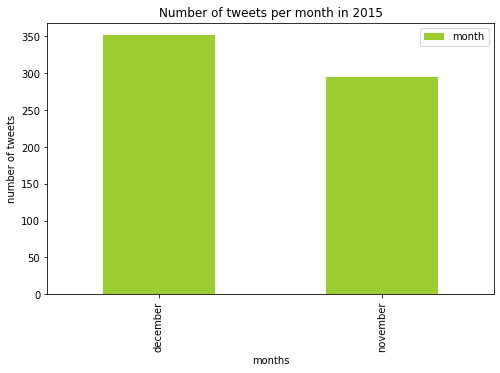

In [160]:
df_2015.month.value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(
    8, 5), ylabel='number of tweets', xlabel='months', color='yellowgreen')
plt.title('Number of tweets per month in 2015')
plt.legend()


In 2015, tweets in december are higher than in november

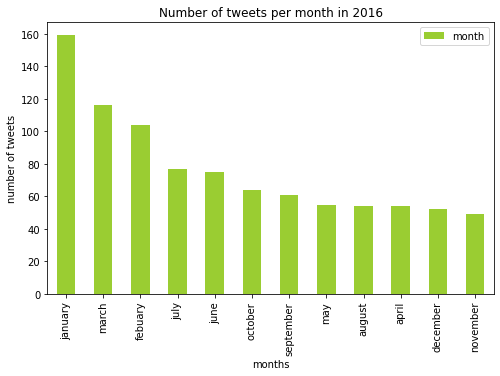

In [161]:
df_2016.month.value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(
    8, 5), ylabel='number of tweets', xlabel='months', color='yellowgreen')
plt.title('Number of tweets per month in 2016')
plt.legend()


In 2016, the month of january has the highest number of tweets, and same as in 2015, december has a higher number of tweets than november.

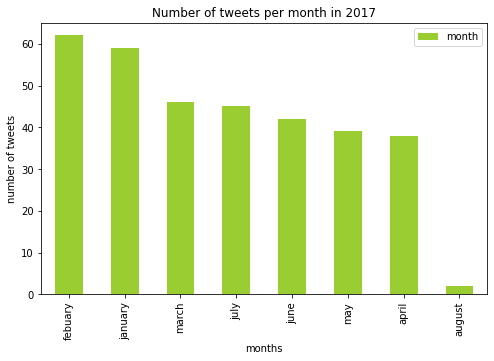

In [162]:
df_2017.month.value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(
    8, 5), ylabel='number of tweets', xlabel='months', color='yellowgreen')
plt.title('Number of tweets per month in 2017')
plt.legend()


In 2017, the highest number of tweets are made on january and febuary and the lowest number of tweets are made on august

##### Evolution of ratings per year

###### In 2015

Text(0.5, 1.0, 'Number of ratings per month in 2015')

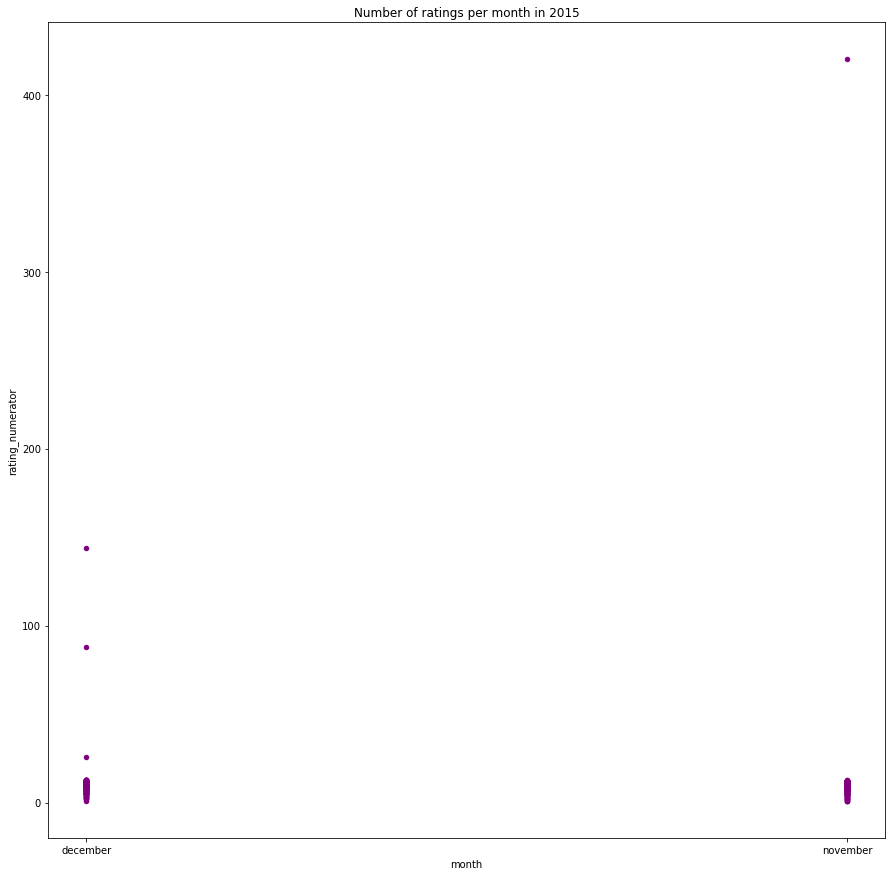

In [163]:
df_2015.plot(kind='scatter', figsize=(15, 15),
             color='purple', x='month', y='rating_numerator')
plt.title('Number of ratings per month in 2015')



In 2015, most of the ratings are concentrated between 0 and 30 and the month of december has the higest number and the higest values of ratings

###### In 2016

Text(0.5, 1.0, 'Number of ratings per month in 2016')

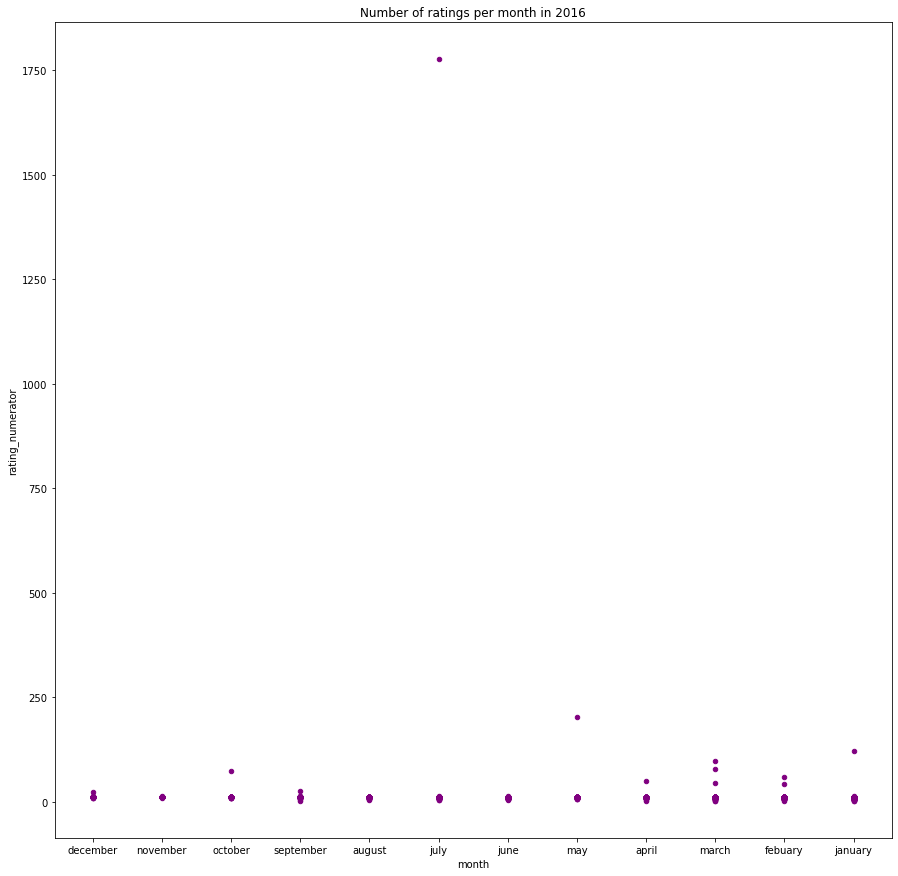

In [164]:
df_2016.plot(kind='scatter', figsize=(15, 15),
             color='purple', x='month', y='rating_numerator')
plt.title('Number of ratings per month in 2016')



In 2016 too, most ratings values range between 0 and 30 with highest number of ratings being in march

###### In 2017

Text(0.5, 1.0, 'Number of ratings per month in 2017')

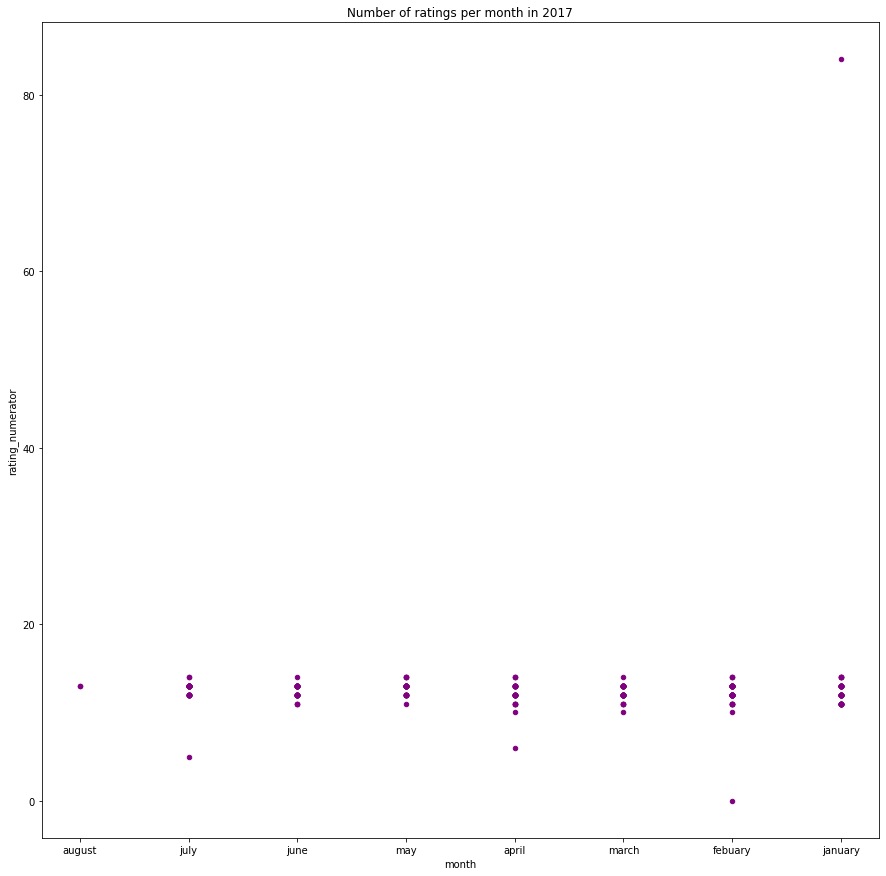

In [165]:
df_2017.plot(kind='scatter', figsize=(15, 15),
        color='purple', x='month', y='rating_numerator')
plt.title('Number of ratings per month in 2017')



In 2017, most of the ratings range between 0 and 20 with the higest number being in febuary,april and march

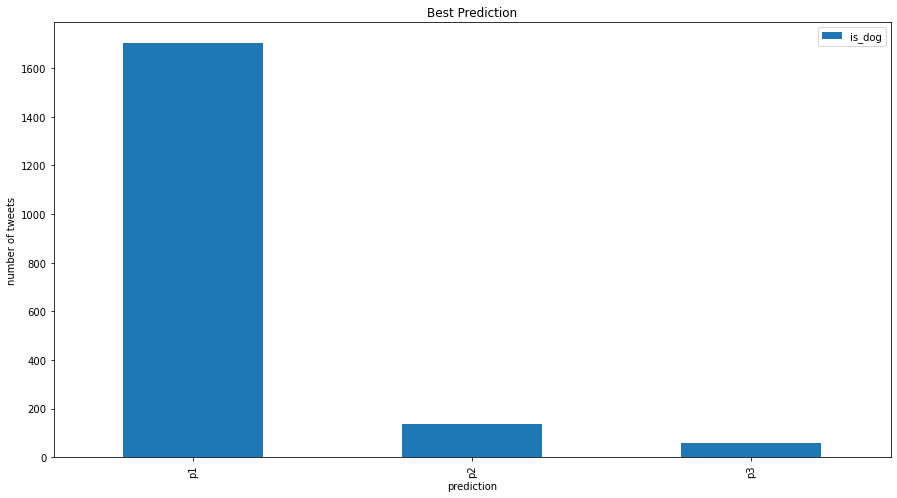

In [166]:
df2.groupby('prediction')['is_dog'].count().sort_values(ascending=False).plot(
    kind='bar', figsize=(15, 8), ylabel='number of tweets')
plt.legend
plt.title('Best Prediction')
plt.legend()


##### What are the top 5 most rated breeds per year?

###### In 2015

In [167]:
best_ratings = df_2015.rating_numerator.sort_values(ascending=False).head()
df_dog2015 = df_2015[df_2015.is_dog == True]
df_dog2015[df_dog2015.rating_numerator.isin(best_ratings)].breed.value_counts().head()


Chihuahua             3
chow                  2
Labrador_retriever    2
kuvasz                1
Samoyed               1
Name: breed, dtype: int64

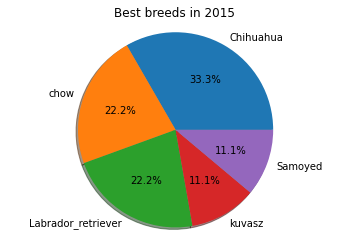

In [168]:
fig1, ax1 = plt.subplots()

labels = df_dog2015[df_dog2015.rating_numerator.isin(
    best_ratings)].breed.value_counts().head().index

sizes = df_dog2015[df_dog2015.rating_numerator.isin(
    best_ratings)].breed.value_counts().head().values

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
        
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Best breeds in 2015')
plt.show()


In 2015, the most rated breeds of dogs are borzoi, Labrador_retriever, chow, Samoyed,  kuvasz, and Chihuahua, with Chihuahua having the higest number of ratings 

###### In 2016

In [169]:
best_ratings = df_2016.rating_numerator.sort_values(ascending=False).head()
df_dog2016 = df_2016[df_2016.is_dog == True]
df_dog2016[df_dog2016.rating_numerator.isin(best_ratings)].breed.value_counts().head()


soft-coated_wheaten_terrier    2
golden_retriever               1
Name: breed, dtype: int64

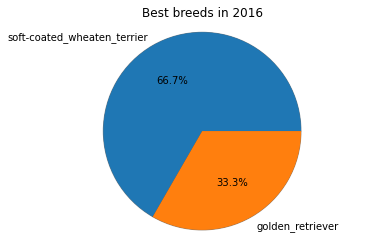

In [170]:
fig1, ax1 = plt.subplots()

labels = df_dog2016[df_dog2016.rating_numerator.isin(
    best_ratings)].breed.value_counts().head().index

sizes = df_dog2016[df_dog2016.rating_numerator.isin(
    best_ratings)].breed.value_counts().head().values

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0, radius=50)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Best breeds in 2016')
plt.show()


In 2016, golden_retriever and soft-coated_wheaten_terrier are the most rated breeds

###### In 2017

In [171]:
best_ratings = df_2017.rating_numerator.sort_values(ascending=False).head()
df_dog2017 = df_2017[df_2017.is_dog == True]
df_dog2017[df_dog2017.rating_numerator.isin(best_ratings)].breed.value_counts().head()


Pembroke                   2
French_bulldog             2
Chihuahua                  1
black-and-tan_coonhound    1
Labrador_retriever         1
Name: breed, dtype: int64

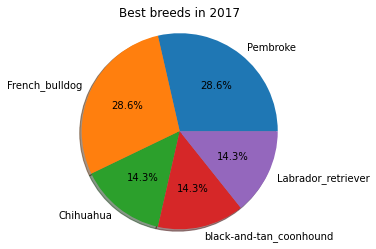

In [172]:
fig1, ax1 = plt.subplots()

labels = df_dog2017[df_dog2017.rating_numerator.isin(
    best_ratings)].breed.value_counts().head().index

sizes = df_dog2017[df_dog2017.rating_numerator.isin(
    best_ratings)].breed.value_counts().head().values

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Best breeds in 2017')
plt.show()


In 2017, the most rated breeds are French_bulldog, Pembroke, Labrador_retriever, black-and-tan_coonhound , and Chihuahua.

##### The most retweeted breeds

###### In 2015

In [173]:
best_ratings = df_2015.retweet_count.sort_values(ascending=False).head()
df_dog2015 = df_2015[df_2015.is_dog == True]
df_dog2015[df_dog2015.retweet_count.isin(
    best_ratings)].breed.value_counts().head()


toy_poodle        2
Chihuahua         1
Great_Pyrenees    1
whippet           1
Name: breed, dtype: int64

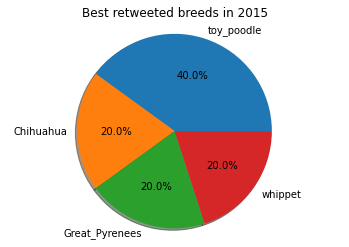

In [174]:
fig1, ax1 = plt.subplots()

labels = df_dog2015[df_dog2015.retweet_count.isin(
    best_ratings)].breed.value_counts().head().index

sizes = df_dog2015[df_dog2015.retweet_count.isin(
    best_ratings)].breed.value_counts().head().values

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Best retweeted breeds in 2015')
plt.show()


In 2015, the most retweeted breeds are toy_poodle, Chihuahua, Great_Pyrenees, and whippet.

###### In 2016

In [175]:
best_ratings = df_2016.retweet_count.sort_values(ascending=False).head()
df_dog2016 = df_2016[df_2016.is_dog == True]
df_dog2016[df_dog2016.retweet_count.isin(
    best_ratings)].breed.value_counts().head()


cocker_spaniel        1
Samoyed               1
Labrador_retriever    1
Name: breed, dtype: int64

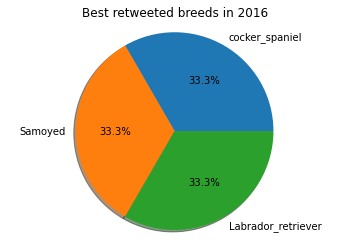

In [176]:
fig1, ax1 = plt.subplots()

labels = df_dog2016[df_dog2016.retweet_count.isin(
    best_ratings)].breed.value_counts().head().index

sizes = df_dog2016[df_dog2016.retweet_count.isin(
    best_ratings)].breed.value_counts().head().values

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Best retweeted breeds in 2016')
plt.show()


In 2016, the most retweeted breeds are Labrador_retriever, Samoyed and cocker_spaniel. 

###### In 2017

In [177]:
best_ratings = df_2017.rating_numerator.sort_values(ascending=False).head()
df_dog2017 = df_2017[df_2017.is_dog == True]
df_dog2017[df_dog2017.rating_numerator.isin(
    best_ratings)].breed.value_counts().head()


Pembroke                   2
French_bulldog             2
Chihuahua                  1
black-and-tan_coonhound    1
Labrador_retriever         1
Name: breed, dtype: int64

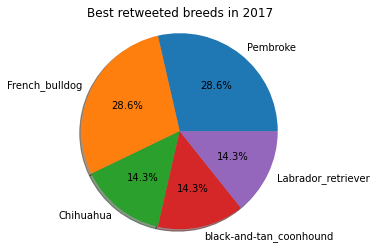

In [178]:
fig1, ax1 = plt.subplots()

labels = df_dog2017[df_dog2017.rating_numerator.isin(
    best_ratings)].breed.value_counts().head().index

sizes = df_dog2017[df_dog2017.rating_numerator.isin(
    best_ratings)].breed.value_counts().head().values

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Best retweeted breeds in 2017')
plt.show()


In 2017, the most retweeted breeds are French_bulldog, Pembroke, Chihuahua, black-and-tan_coonhound, Labrador_retriever. 

##### Relationship between retweet count and favorite count

Text(0.5, 1.0, 'Relationship betwwen count and favorite count')

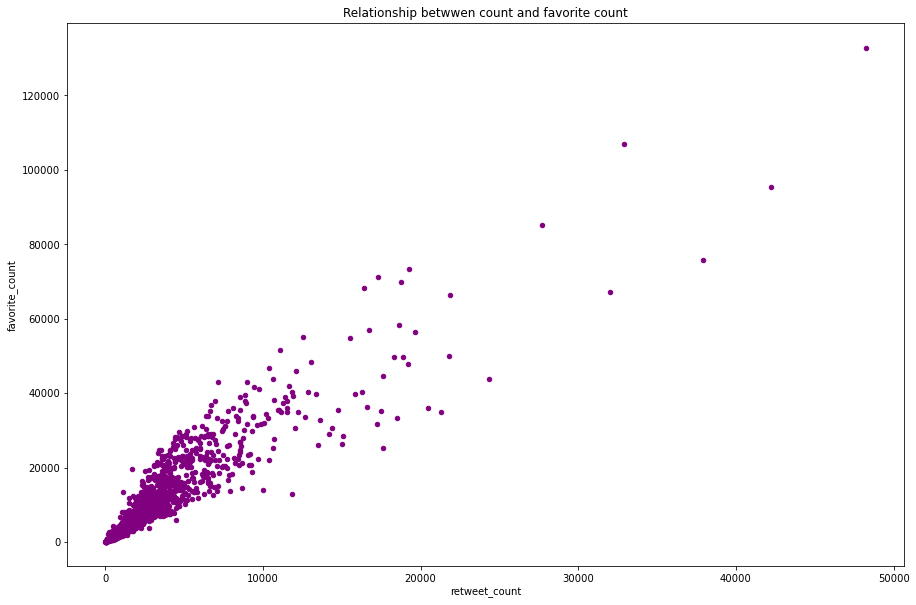

In [179]:
df2.plot(kind='scatter', figsize=(15, 10),
        color='purple', x='retweet_count', y='favorite_count')
plt.title('Relationship betwwen count and favorite count')

We clearly see that, the value of retweet count globally increase with the value of favorite count. This shows that whenever a user retweets a tweet, he also chooses it as favorite.